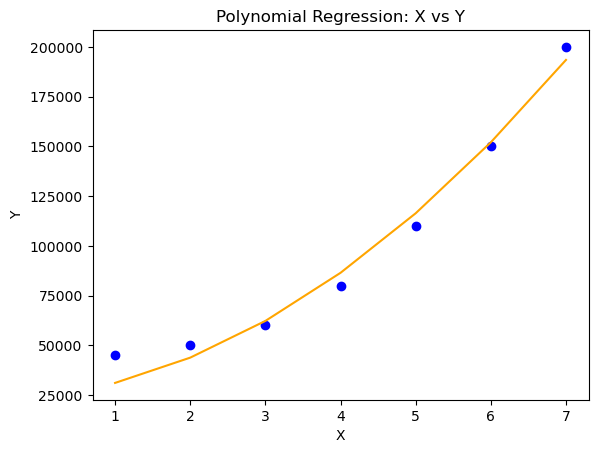

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial regression class
class PolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefs = None

    def transform(self, X):
        """Transforms the input data into polynomial features."""
        X_poly = np.ones((X.shape[0], self.degree + 1))
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X[:, 0] ** i
        return X_poly

    def fit(self, X, Y):
        """Fit the polynomial regression model using gradient descent."""
        X_poly = self.transform(X)
        self.coefs = np.zeros(X_poly.shape[1])

        for _ in range(self.iterations):
            Y_pred = X_poly.dot(self.coefs)
            error = Y_pred - Y
            gradient = X_poly.T.dot(error) / len(Y)
            self.coefs -= self.learning_rate * gradient

    def predict(self, X):
        """Predict the output using the trained model."""
        X_poly = self.transform(X)
        return X_poly.dot(self.coefs)

# Driver code
def main():
    # Create dataset
    X = np.array([[1], [2], [3], [4], [5], [6], [7]])
    Y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000])

    # Model training
    model = PolynomialRegression(degree=2, learning_rate=0.001, iterations=10000)
    model.fit(X, Y)

    # Prediction
    Y_pred = model.predict(X)

    # Visualization
    plt.scatter(X, Y, color='blue')
    plt.plot(X, Y_pred, color='orange')
    plt.title('Polynomial Regression: X vs Y')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

if __name__ == "__main__":
    main()
